In [26]:
import numpy as np 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
from shapely.geometry import Point
import seaborn as sns
from plotnine import *
%matplotlib inline 
%config InlineBackend.figure_format='retina'
# set mamp general general aspect 
plt.rcParams['figure.dpi'] = 80
# set figures path 
Fig = 'Figures/'

# 1. Evolution of the COVID-related mortality rate in European countries

In [2]:
# figure 1 
ds = pd.read_excel('../../02_Data/02_Pandemic variables/03_Exc. Mortality/Excess_mortality_database_v220103.xls',
              sheet_name = 'Excess_mortality_Abs', skiprows = 1).drop(['Code 2016', 'NUTS level 3', 'Pop_2020'], axis =1)

In [3]:
ds = ds.groupby('Country code').mean().T
ds

Country code,AL,AT,BE,BG,CH,CY,CZ,DE,DK,EE,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
2020_W01,-3.766667,-5.577143,-3.554545,-16.892857,-5.946154,21.2,-4.314286,-29.390625,-0.400000,-16.566667,...,-4.455,-6.454545,-0.556164,-11.888,-13.809524,-14.744,-7.304762,-21.6,-1.475,1.678212
2020_W02,-3.116667,-4.434286,-0.990909,-10.571429,-4.369231,15.2,-1.257143,-12.765625,3.181818,-6.200000,...,0.290,1.454545,-3.706849,-6.112,-12.509524,-12.704,-2.933333,-30.2,-6.100,-10.703911
2020_W03,-6.233333,0.297143,-2.472727,-12.278571,-2.730769,26.8,-10.357143,-37.515625,-2.854545,-8.533333,...,-3.285,-5.872727,-6.580822,-3.816,-10.161905,-3.504,-5.542857,-35.8,-14.250,-9.215642
2020_W04,-3.100000,0.908571,-4.963636,-4.135714,-1.600000,11.2,-3.514286,-64.968750,-6.090909,-12.133333,...,-7.255,-3.436364,-8.213699,-6.544,-11.071429,1.184,-9.219048,-20.4,-6.675,-10.992179
2020_W05,-2.466667,3.662857,-3.500000,-0.764286,-1.576923,21.2,-2.971429,-37.609375,-5.018182,-10.800000,...,-3.605,-6.490909,-4.268493,-0.224,-9.123810,2.096,-1.838095,-11.4,-7.750,-6.649162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021_W39,NaN,5.737143,0.759091,36.635714,2.638462,24.2,3.914286,85.281250,14.363636,60.400000,...,9.355,5.290909,9.887671,5.464,66.619048,56.832,3.266667,78.6,13.475,8.926257
2021_W40,NaN,2.748571,1.886364,39.400000,-1.384615,13.2,-0.914286,88.359375,8.509091,51.200000,...,8.680,5.945455,11.690411,8.464,105.352381,62.248,-1.961905,35.6,28.075,9.186592
2021_W41,NaN,3.342857,4.318182,49.892857,1.784615,25.2,6.185714,83.812500,15.381818,72.600000,...,6.030,4.000000,13.175342,10.424,135.747619,57.968,-0.800000,69.2,26.700,7.934078
2021_W42,NaN,6.280000,7.431818,62.221429,1.915385,21.8,15.085714,144.765625,13.200000,71.600000,...,12.725,8.400000,15.797260,3.832,150.423810,46.944,2.323810,97.2,37.575,8.556425


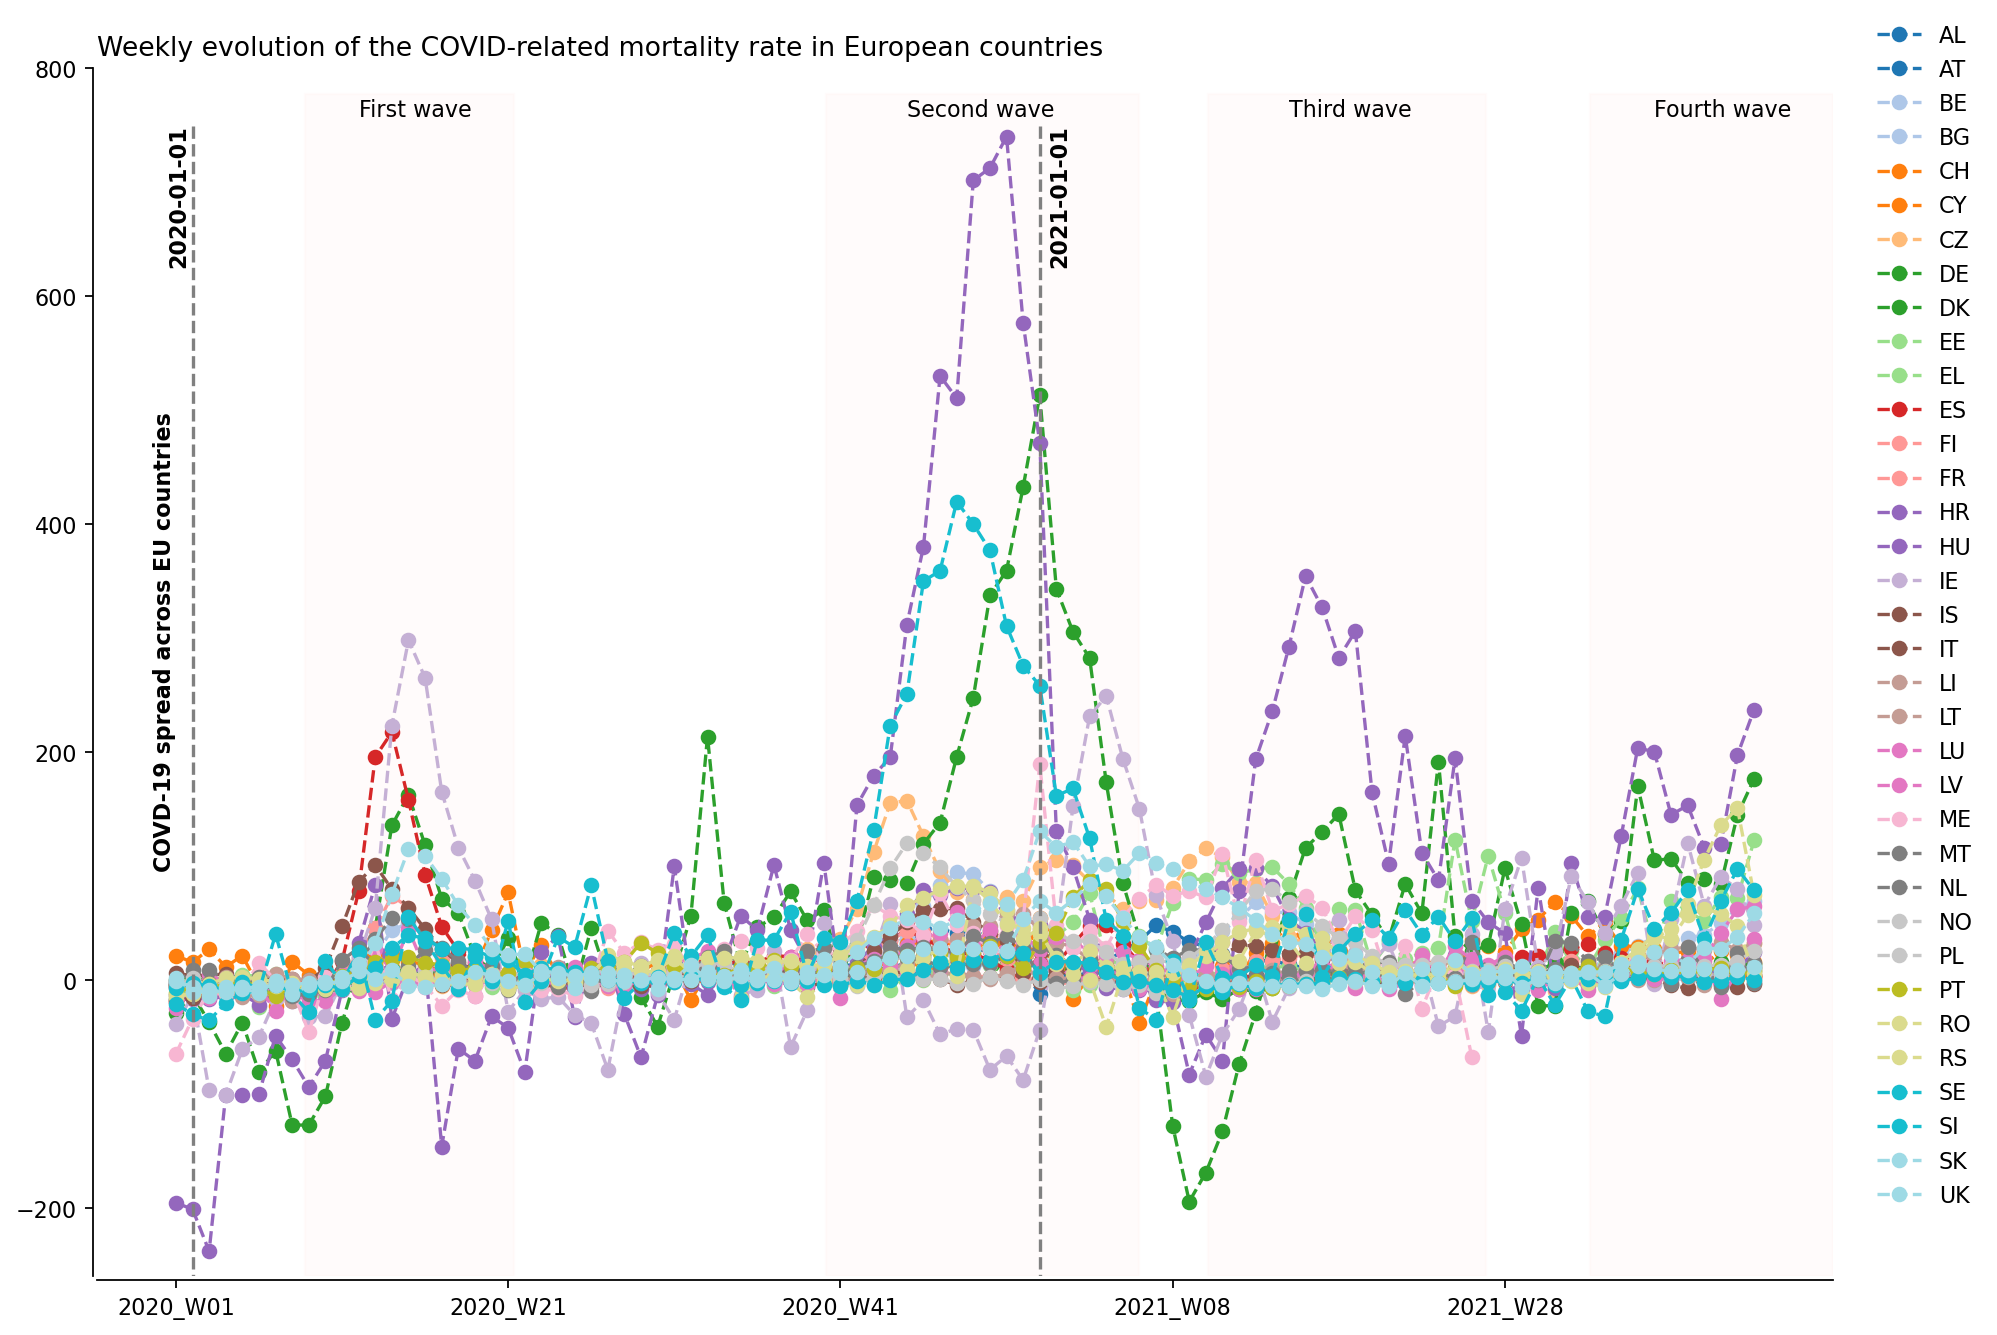

In [4]:
with plt.style.context('seaborn-deep'):
    ds.plot(figsize = (14,10), marker = 'o', linestyle = '--', cmap = 'tab20')
plt.title('Weekly evolution of the COVID-related mortality rate in European countries',
          loc = 'left', fontweight = 'light')

plt.text(x = -1.4, y = 100, s = 'COVD-19 spread across EU countries', rotation = 90, fontweight = 'bold')
# add the years 
plt.vlines(x = 1, ymin = -300, ymax = 750, color = 'grey', linestyle = 'dashed')
plt.text(x = -0.5, y = 630, s = '2020-01-01', rotation = 90, fontweight = 'bold')

plt.vlines(x = 52, ymin = -300, ymax = 750, color = 'grey', linestyle = 'dashed')
plt.text(x = 52.5, y = 630, s = '2021-01-01', rotation = 90, fontweight = 'bold')

# add the waves 
plt.axhspan(xmin =0.12, xmax = 0.24, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 11, y = 758, s = 'First wave', fontweight = 'light')

plt.axhspan(xmin =0.42, xmax = 0.6, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 44, y = 758, s = 'Second wave', fontweight = 'light')

plt.axhspan(xmin =0.64, xmax = 0.8, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 67, y = 758, s = 'Third wave', fontweight = 'light')


plt.axhspan(xmin =0.86, xmax = 1, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 89, y = 758, s = 'Fourth wave', fontweight = 'light')

plt.ylim([-260, 800])
plt.legend(loc = [1.02, .05], frameon = False).set_title('')
sns.despine(offset=2)

# plt.savefig(Fig + 'Figure_01.png', dpi = 500)

# 2. COVID-19 deaths rate per 10_000 inhabitants (three waves)

Draw three maps corresponding to each COVID-19 wave.

In [50]:
## read the shape file 
shape = gpd.read_file('../../02_Data/01_GIS/02_Full file/NUTS_COVID.shp')[['NUTS_ID', 'geometry']]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = pd.read_csv('../../02_Data/world_cities.txt')
# turn lat and lng values into geodata 
geo_points = [Point(x,y) for x,y in zip(cities['lng'], cities['lat'])]
cities = gpd.GeoDataFrame(cities, geometry = geo_points)
cities = cities[cities['iso2'].isin(ds.columns.tolist())].sort_values(by = 'population', ascending = False).head(20)

In [51]:
## read the population data 
population = pd.read_excel('../../02_Data/02_Pandemic variables/03_Exc. Mortality/Excess_mortality_database_v220103.xls',
                          sheet_name = 'EM_FINAL_absolute')[['NUTS_ID_2021', 'Pop_2020_01_01']]

## read the deaths data 
deaths = pd.read_excel('../../02_Data/02_Pandemic variables/02_Deaths/EU_Deaths_Daily_Unstacked.xlsx', index_col = 'nuts_id').drop('country', axis =1)
# deaths waves 
deaths['D_first_wave'] = deaths.loc[:, pd.to_datetime('2020-03-01') : pd.to_datetime('2020-05-01')].sum(axis =1)
deaths['D_second_wave'] = deaths.loc[:, pd.to_datetime('2020-09-01') : pd.to_datetime('2021-05-01')].sum(axis =1)
deaths['D_third_wave'] = deaths.loc[:, pd.to_datetime('2021-07-01') : pd.to_datetime('2021-12-01')].sum(axis =1)
deaths = deaths.filter(like = 'wave')

d = pd.merge(deaths, population, left_on = deaths.index, right_on = "NUTS_ID_2021")
for col in deaths.columns:
    d[col] = (d[col] / d['Pop_2020_01_01']) * 10_000

In [52]:
geo_d_rate = gpd.GeoDataFrame(pd.merge(d, shape, left_on = 'NUTS_ID_2021', right_on = 'NUTS_ID'))

In [60]:
# convert the geo data 
shape = shape.to_crs(epsg = 3035)
geo_d_rate = geo_d_rate.to_crs(epsg = 3035)
world = world.to_crs(epsg = 3035)
cities.crs = "epsg:4326"
cities = cities.to_crs(epsg = 3035)

In [61]:
geo_d_rate

,D_first_wave,D_second_wave,D_third_wave,NUTS_ID_2021,Pop_2020_01_01,NUTS_ID,geometry
0,0.267494,10.699765,0.534988,AT111,37384,AT111,"POLYGON ((4821838.742 2726166.304, 4809143.714..."
1,0.374850,6.309976,0.812175,AT112,160064,AT112,"POLYGON ((4854633.443 2791782.864, 4851092.605..."
2,0.309317,16.806203,0.721739,AT113,96988,AT113,"POLYGON ((4806751.304 2714374.758, 4810965.710..."
3,0.889439,10.511549,1.334158,AT121,247347,AT121,"POLYGON ((4729365.117 2815976.523, 4729868.614..."
4,0.536078,11.487387,1.761399,AT122,261156,AT122,"POLYGON ((4798615.884 2772722.270, 4792731.113..."
...,...,...,...,...,...,...,...
319,1.308574,12.337986,2.679462,CH063,160480,CH063,"POLYGON ((4245479.041 2673794.227, 4237630.838..."
320,0.000000,10.282099,3.427366,CH064,37930,CH064,"MULTIPOLYGON (((4196349.305 2631874.354, 41895..."
321,0.464177,4.409683,1.160443,CH065,43087,CH065,"POLYGON ((4204396.238 2654871.161, 4206744.089..."
322,0.626753,8.539509,1.488538,CH066,127642,CH066,"POLYGON ((4221785.899 2673103.543, 4216665.820..."


In [94]:
cities.query('city == "Warsaw"')['geometry'].y

422    3.291147e+06
dtype: float64

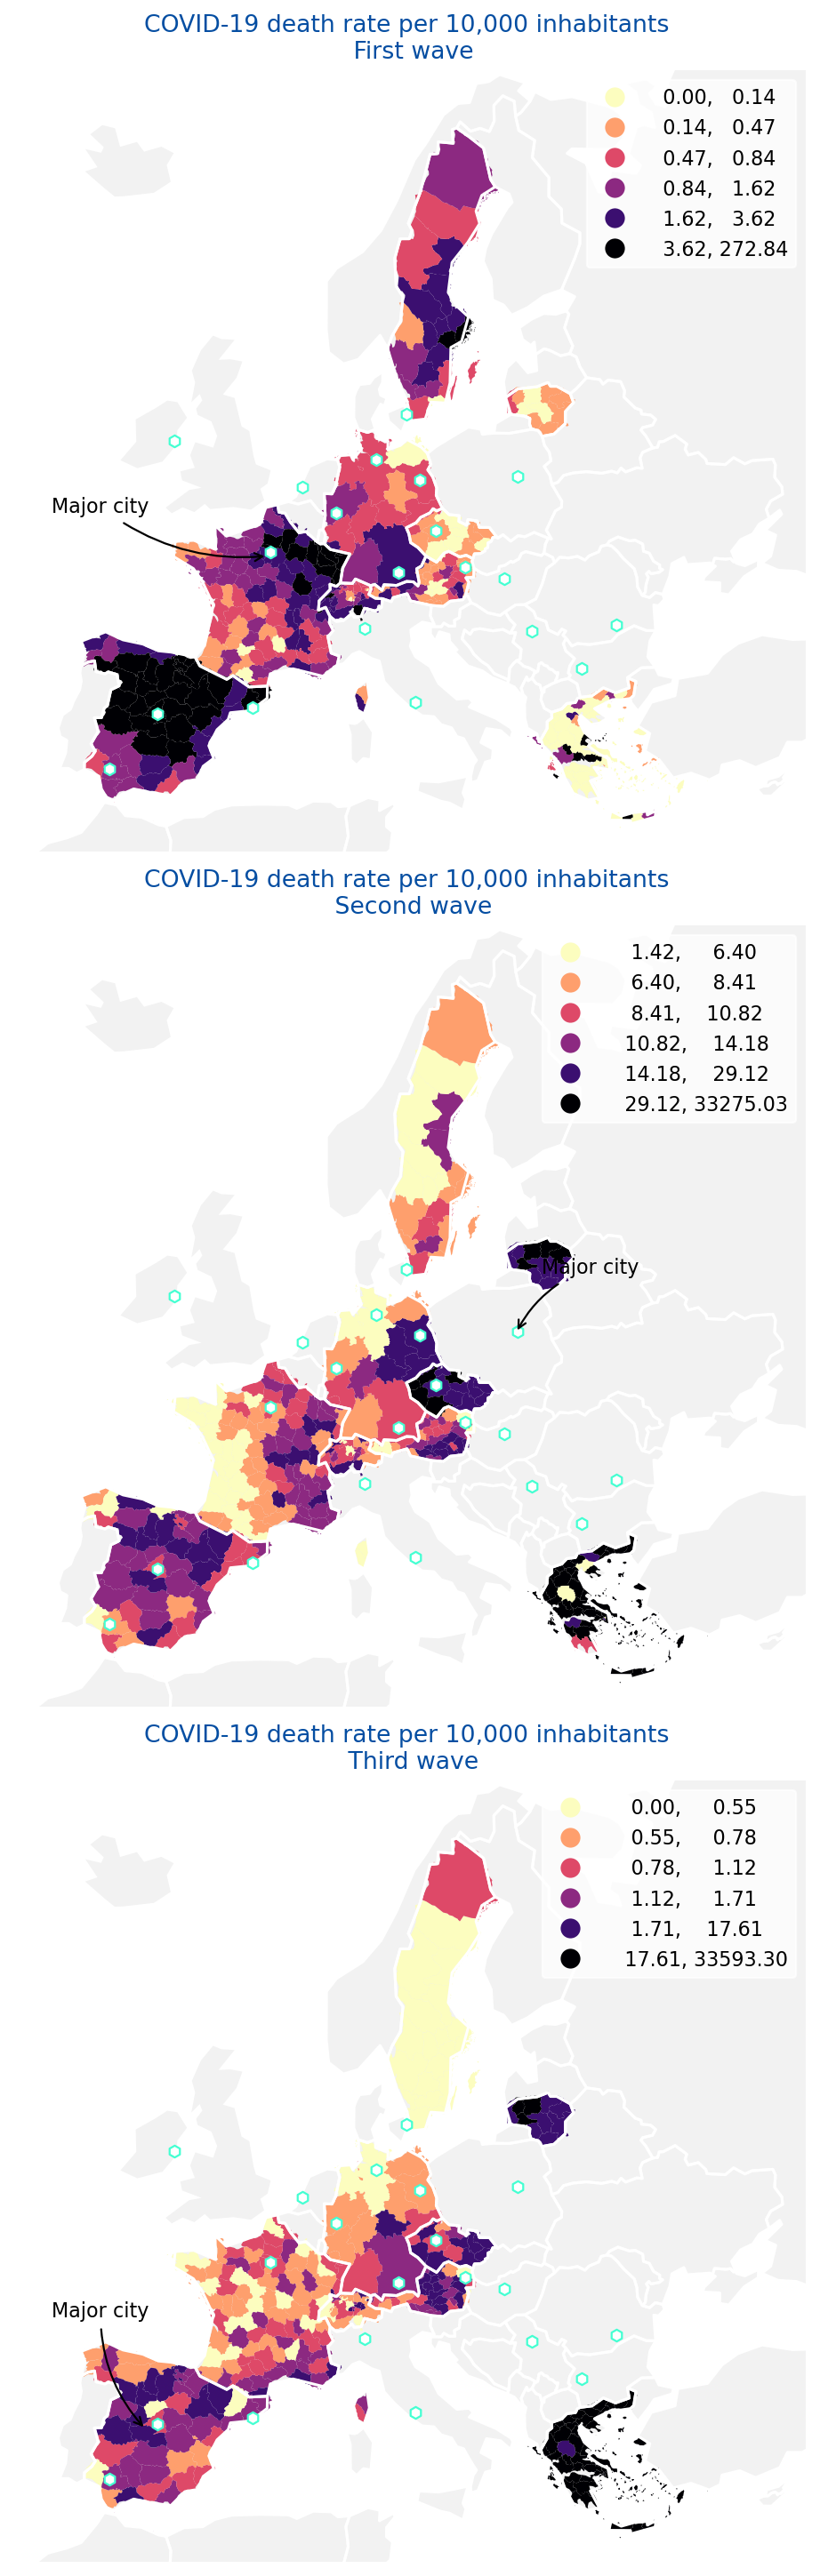

In [98]:
# ploat the maps 

fig, ax = plt.subplots(3,1, figsize = (19, 18), constrained_layout = True)
world.plot(ax = ax[0], color = 'grey', alpha = .1)
geo_d_rate.plot(column = 'D_first_wave', ax = ax[0], cmap='magma_r', scheme='quantiles', k = 6, legend = True)
world.query('iso_a3 != "IRL" and iso_a3 != "GBR" and iso_a3 != "ISL"').boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax[0])
ax[0].set_xlim(2.4e6, 6.6e6)
ax[0].set_ylim(0.13e7, 0.545e7)
ax[0].set_title('COVID-19 death rate per 10,000 inhabitants \n First wave', loc = 'center', color = '#054ea2')
# legend 
leg = ax[0].get_legend()
leg.get_frame().set_color('w')
# annotate 
ax[0].annotate("Major city", xy=(3.75e6, 2.87e6), xytext=(2.6e6, 3.1e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


world.plot(ax = ax[1], color = 'grey', alpha = .1)
geo_d_rate.plot(column = 'D_second_wave', ax = ax[1], cmap='magma_r', scheme='quantiles', k = 6, legend = True)
world.query('iso_a3 != "IRL" and iso_a3 != "GBR" and iso_a3 != "ISL"').boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax[1])
ax[1].set_title('COVID-19 death rate per 10,000 inhabitants \n Second wave', loc ='center', color = '#054ea2')
ax[1].set_xlim(2.4e6, 6.6e6)
ax[1].set_ylim(0.13e7, 0.545e7)
# legend 
leg = ax[1].get_legend()
leg.get_frame().set_color('w')

# annotate 
ax[1].annotate("Major city", xy=(5.06e6, 3.28e6), xytext=(5.2e6, 3.6e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


world.plot(ax = ax[2], color = 'grey', alpha = .1)
geo_d_rate.plot(column = 'D_third_wave', ax = ax[2], cmap='magma_r', scheme='quantiles', k = 6, legend = True)
world.query('iso_a3 != "IRL" and iso_a3 != "GBR" and iso_a3 != "ISL"').boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax[2])
ax[2].set_title('COVID-19 death rate per 10,000 inhabitants \n Third wave', loc = 'center', color = '#054ea2')
ax[2].set_xlim(2.4e6, 6.6e6)
ax[2].set_ylim(0.13e7, 0.545e7)
# legend 
leg = ax[2].get_legend()
leg.get_frame().set_color('w')

# annotate 
ax[2].annotate("Major city", xy=(3.1e6, 2e6), xytext=(2.6e6, 2.6e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

for i in range(3): 
    ax[i].axis('off')
    cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#44FFD2')

plt.show()

# plt.savefig(Fig + 'Figure_02.png', dpi = 500)

During the first wave we can notice that the virus has affected the major centers of Europe such as Mardird, Paris, Milan. This spread can be apprehended as the spread of the virus with the flows of people from aeroports, and economical exchnage, tourisme, and the most affected regions are the central european regions, while the Eastern regions are not severly affected may be because of low tourism and global economic attractivity. However, during the second wave, we notice that the virus is transitioning to the Eastern European countires with the flow of people within and between regions, while we notice that prevouis regions from central europe were showing that they manage to control the virus with different lockdown measures. During the third wave, the holistic behavior of EU regions maintain, meaning that regions that were affected during the first wave are still showing a coping capacity to manage and control the virus, while in Eastern European countries they still have the highest rates of covid-19 deaths. This might be explained by the financial capacity of central european regions to initiate policies and maitain lockdown, while eastern european countries, with less finacial capacity -compared to central europeran regions- they display difficulties in maniging and controlling the spread of the virus.    

## 3. Fatality rate vs Mortality Rate  

# 4. COVID-19 Deaths by country 

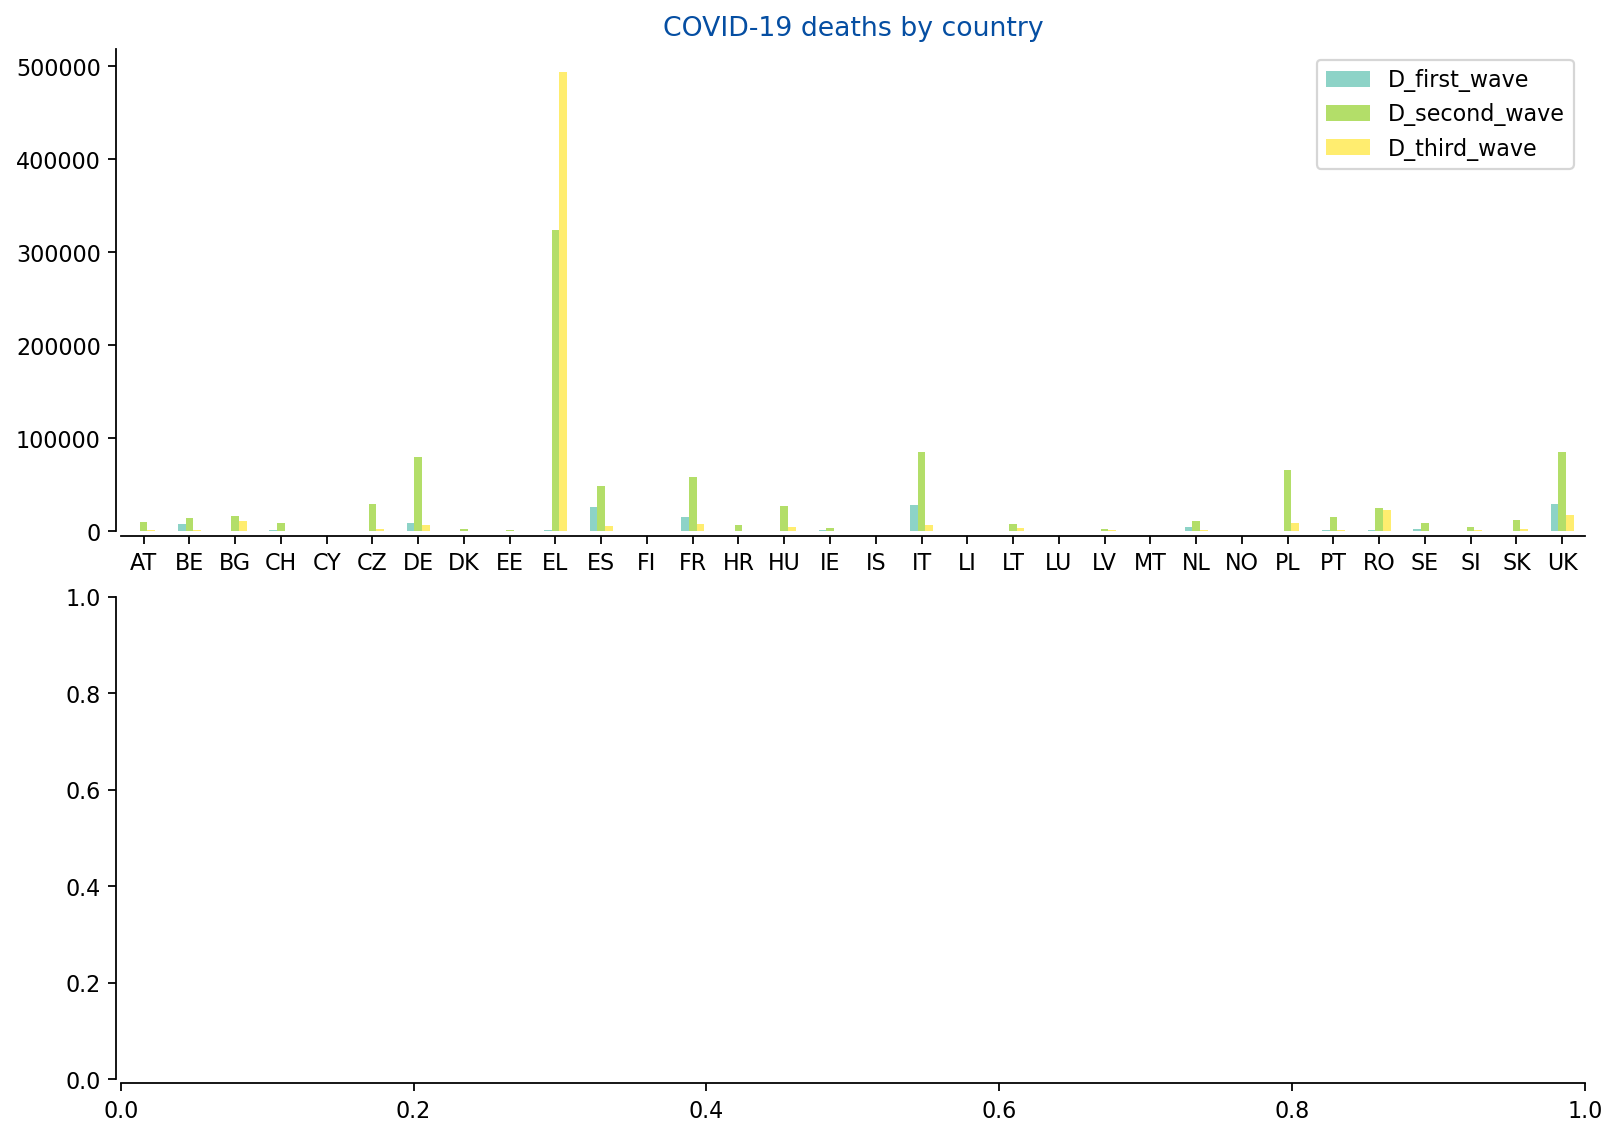

In [57]:
ds = deaths.reset_index()

ds['Country'] = ds['nuts_id'].apply(lambda x: x[:2])
ds

with plt.style.context('seaborn-deep'):
    fig, ax = plt.subplots(2,1, figsize = (10,7), constrained_layout = True)
    ds.groupby('Country').sum().plot(kind = 'bar', ylabel = '', xlabel = '',
                                    cmap = 'Set3', ax =ax[0])
    ax[0].set_title('COVID-19 deaths by country',  color = '#054ea2')
    
sns.despine(offset=2)

# 7. Descriptive statistics

# 6. Correlation matrix